**Dataset Description**

Your challenge in this competition is to answer multiple-choice questions written by an LLM. While the specifics of the process used to generate these questions aren't public, we've included 200 sample questions with answers to show the format, and to give a general sense of the kind of questions in the test set. However, there may be a distributional shift between the sample questions and the test set, so solutions that generalize to a broad set of questions are likely to perform better. Each question consists of a prompt (the question), 5 options labeled A, B, C, D, and E, and the correct answer labeled answer (this holds the label of the most correct answer, as defined by the generating LLM).

This competition uses a hidden test. When your submitted notebook is scored, the actual test data (including a sample submission) will be made available to your notebook. The test set has the same format as the provided test.csv but has ~4000 questions that may be different is subject matter.

**Files**

train.csv - a set of 200 questions with the answer column
test.csv - the test set; your task it to predict the top three most probable answers given the prompt. NOTE: the test data you see here just a copy of the training data without the answers. The unseen re-run test set is comprised of ~4,000 different prompts.
sample_submission.csv - a sample submission file in the correct format

**Columns**

prompt - the text of the question being asked
A - option A; if this option is correct, then answer will be A
B - option B; if this option is correct, then answer will be B
C - option C; if this option is correct, then answer will be C
D - option D; if this option is correct, then answer will be D
E - option E; if this option is correct, then answer will be E
answer - the most correct answer, as defined by the generating LLM (one of A, B, C, D, or E).

In [1]:
# Library to suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Libraries to help with data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Path for  data train
train_data = "/content/drive/MyDrive/LLM Science Exam/train.csv"

In [5]:
# Path for  data test
test_data = "/content/drive/MyDrive/LLM Science Exam/test.csv"

In [6]:
df_test = pd.read_csv(test_data)

In [7]:
df_train = pd.read_csv(train_data)

In [8]:
df_train.head()

,id,prompt,A,B,C,D,E,answer
0,0,Which of the following statements accurately d...,MOND is a theory that reduces the observed mis...,MOND is a theory that increases the discrepanc...,MOND is a theory that explains the missing bar...,MOND is a theory that reduces the discrepancy ...,MOND is a theory that eliminates the observed ...,D
1,1,Which of the following is an accurate definiti...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...,A
2,2,Which of the following statements accurately d...,The triskeles symbol was reconstructed as a fe...,The triskeles symbol is a representation of th...,The triskeles symbol is a representation of a ...,The triskeles symbol represents three interloc...,The triskeles symbol is a representation of th...,A
3,3,What is the significance of regularization in ...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,C
4,4,Which of the following statements accurately d...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,D


In [9]:
df_train.drop(columns=['id'], inplace=True)

In [10]:
df_test.head()

,id,prompt,A,B,C,D,E
0,0,Which of the following statements accurately d...,MOND is a theory that reduces the observed mis...,MOND is a theory that increases the discrepanc...,MOND is a theory that explains the missing bar...,MOND is a theory that reduces the discrepancy ...,MOND is a theory that eliminates the observed ...
1,1,Which of the following is an accurate definiti...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...
2,2,Which of the following statements accurately d...,The triskeles symbol was reconstructed as a fe...,The triskeles symbol is a representation of th...,The triskeles symbol is a representation of a ...,The triskeles symbol represents three interloc...,The triskeles symbol is a representation of th...
3,3,What is the significance of regularization in ...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...
4,4,Which of the following statements accurately d...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...


In [11]:
df_test.drop(columns=['id'], inplace=True)

In [12]:
from transformers import pipeline

In [13]:
# Initializes question-answering pipeline using the Huggin Face Transformers library
# Pipeline is designed for natural language processing tasks related to question answering
# Uses pre-trained models to extract answers from a given context
# qa model can be used to answer questions based on a provided context
# you would pass a question and its corresponding context to the pipeline
# the model would generate an answer based on its understanding o the language and context
qa_model = pipeline("question-answering")

No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

In [14]:
# Create a new DataFrame to store the predicted answers
df_pred = pd.DataFrame(columns=['prompt','top_answer_1','top_answer_2','top_answer_3'])

In [15]:
for _, row in df_train.iterrows():
  # Define the prompt and answer choices
  prompt = row['prompt']
  choices = [str(row['A']), str(row['B']), str(row['C']), str(row['D']), str(row['E'])]

  # Combine prompt and choices
  question = {'question':prompt, 'context':' '.join(choices)}

  # Get the answer
  answers = qa_model(question, top_k=3)

  # Print the answer
  # print(f'The answer is: {answer}')
  # Add the answers to the dataframe
  df_pred = df_pred.append({
      'prompt': prompt,
      'top_answer_1': row[df_train.iloc[0]['answer']],
      'top_answer_2': row[df_train.iloc[1]['answer']],
      'top_answer_3': row[df_train.iloc[2]['answer']]
  }, ignore_index=True)

In [16]:
df_pred.head()

,prompt,top_answer_1,top_answer_2,top_answer_3
0,Which of the following statements accurately d...,MOND is a theory that reduces the discrepancy ...,MOND is a theory that reduces the observed mis...,MOND is a theory that reduces the observed mis...
1,Which of the following is an accurate definiti...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the evolution of sel...
2,Which of the following statements accurately d...,The triskeles symbol represents three interloc...,The triskeles symbol was reconstructed as a fe...,The triskeles symbol was reconstructed as a fe...
3,What is the significance of regularization in ...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...
4,Which of the following statements accurately d...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...


In [17]:
df_combined = pd.merge(df_train, df_pred, how='inner',on='prompt')

In [18]:
df_combined.head()

,prompt,A,B,C,D,E,answer,top_answer_1,top_answer_2,top_answer_3
0,Which of the following statements accurately d...,MOND is a theory that reduces the observed mis...,MOND is a theory that increases the discrepanc...,MOND is a theory that explains the missing bar...,MOND is a theory that reduces the discrepancy ...,MOND is a theory that eliminates the observed ...,D,MOND is a theory that reduces the discrepancy ...,MOND is a theory that reduces the observed mis...,MOND is a theory that reduces the observed mis...
1,Which of the following is an accurate definiti...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...,A,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the evolution of sel...
2,Which of the following statements accurately d...,The triskeles symbol was reconstructed as a fe...,The triskeles symbol is a representation of th...,The triskeles symbol is a representation of a ...,The triskeles symbol represents three interloc...,The triskeles symbol is a representation of th...,A,The triskeles symbol represents three interloc...,The triskeles symbol was reconstructed as a fe...,The triskeles symbol was reconstructed as a fe...
3,What is the significance of regularization in ...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,C,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...
4,Which of the following statements accurately d...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,D,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...


In [19]:
# Function to apply the logic for each row
def translate_answer(row):
  if row['answer'] == 'D':
    return row['D']
  elif row['answer'] == 'A':
    return row['A']
  elif row['answer'] == 'B':
    return row['B']
  elif row['answer'] == 'C':
    return row['C']
  elif row['answer'] == 'E':
    return row['E']
  else:
    # Add more conditions for other values if needed
    return np.nan  # Default value for other cases

In [20]:
# Apply the function to create the 'answer_translated' column
df_combined['answer_translated'] = df_combined.apply(translate_answer, axis=1)

In [21]:
df_combined.head()

,prompt,A,B,C,D,E,answer,top_answer_1,top_answer_2,top_answer_3,answer_translated
0,Which of the following statements accurately d...,MOND is a theory that reduces the observed mis...,MOND is a theory that increases the discrepanc...,MOND is a theory that explains the missing bar...,MOND is a theory that reduces the discrepancy ...,MOND is a theory that eliminates the observed ...,D,MOND is a theory that reduces the discrepancy ...,MOND is a theory that reduces the observed mis...,MOND is a theory that reduces the observed mis...,MOND is a theory that reduces the discrepancy ...
1,Which of the following is an accurate definiti...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...,A,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the evolution of sel...
2,Which of the following statements accurately d...,The triskeles symbol was reconstructed as a fe...,The triskeles symbol is a representation of th...,The triskeles symbol is a representation of a ...,The triskeles symbol represents three interloc...,The triskeles symbol is a representation of th...,A,The triskeles symbol represents three interloc...,The triskeles symbol was reconstructed as a fe...,The triskeles symbol was reconstructed as a fe...,The triskeles symbol was reconstructed as a fe...
3,What is the significance of regularization in ...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,C,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...
4,Which of the following statements accurately d...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,D,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...


In [22]:
# Evaluate performance
# df_combined['accuracy'] = df_combined['answer_translated'].equals(df_combined['top_answer_1'])
df_combined['accuracy'] = np.where(df_combined['answer_translated'] == df_combined['top_answer_1'], 1, 0)

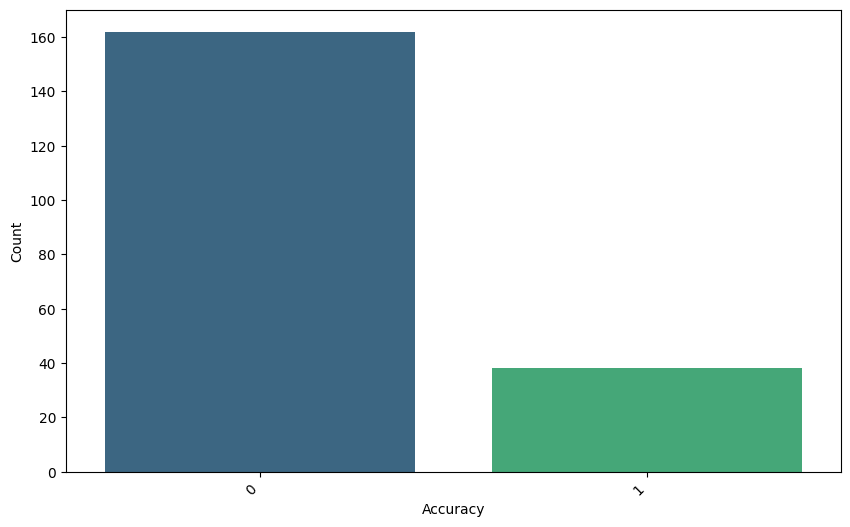

In [23]:
# Count the occurrences of each category
category_counts = df_combined['accuracy'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')

# Set plot labels and title
plt.xlabel('Accuracy')
plt.ylabel('Count')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

In [25]:
# calculate the percentage of accuracy
accuracy = df_combined['accuracy'].mean() * 100

print(f"The percentage of accuracy is {accuracy:.2f}%")

The percentage of accuracy is 19.00%
